In [8]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    features_X = np.c_[np.ones(data.shape[0]), data[:, :3]]

    return features_X, sales_Y


In [9]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [10]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [11]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
    individual = np.random.uniform(-bound/2, bound/2, n).tolist()
    return individual

In [13]:
individual = create_individual()
print(individual)

[-0.7634520066109527, 1.4589411306665614, -0.6241278873730751, 3.917730007820797]


In [16]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1 / (loss + 1)
    return fitness

In [17]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [18]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    if random.random() < crossover_rate:
        crossover_point = random.randint(1, len(individual1) - 1)
        individual1_new[crossover_point:], individual2_new[crossover_point:] = (
            individual2[crossover_point:],
            individual1[crossover_point:]
        )
        
    return individual1_new, individual2_new

In [20]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [4.09, 4.82, 3.1, -2.41]
individual2:  [3.44, 2.57, -0.79, 4.02]


In [22]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_m[i] += np.random.uniform(-1, 1)

    return individual_m

In [23]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [26]:
def initializePopulation(m):
      population = [create_individual() for _ in range(m)]
      return population

In [25]:
population = initializePopulation(100)
print(len(population))

100


In [27]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [28]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-4.343951327900744, 3.5627617962278197, -3.3787973929116677, 0.5968240582344801]


In [29]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print("Best loss:", compute_loss(sorted_population[m - 1]), "with chromosome: ", sorted_population[m - 1])

    new_population = []
    while len(new_population) < m - elitism:
        parent1 = selection(sorted_population, m)
        parent2 = selection(sorted_population, m)
        offspring1, offspring2 = crossover(parent1, parent2)
        offspring1 = mutate(offspring1)
        offspring2 = mutate(offspring2)
        new_population.extend([offspring1, offspring2])

    for ind in sorted_population[m - elitism:]:
        new_population.append(ind)

    return new_population[:m], compute_loss(sorted_population[m - 1])

In [30]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromosome:  [3.44, 2.57, -0.79, -2.41]


In [31]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):
        population, best_loss = create_new_population(population, elitism=2, gen=i + 1)
        losses_list.append(best_loss)

  return losses_list


In [32]:
losses_list = run_GA()

Best loss: 886.5830700405681 with chromosome:  [2.21198112930903, -0.1989219285481605, 1.4386403672259673, 0.017731306999452023]
Best loss: 118.10399480599783 with chromosome:  [2.1050532863019855, 0.05113438617738719, -0.21227363182291903, 0.4825628194208793]
Best loss: 118.10399480599783 with chromosome:  [2.1050532863019855, 0.05113438617738719, -0.21227363182291903, 0.4825628194208793]
Best loss: 118.10399480599783 with chromosome:  [2.1050532863019855, 0.05113438617738719, -0.21227363182291903, 0.4825628194208793]
Best loss: 118.10399480599783 with chromosome:  [2.1050532863019855, 0.05113438617738719, -0.21227363182291903, 0.4825628194208793]
Best loss: 43.23373133646474 with chromosome:  [4.132843408854809, 0.05113438617738719, -0.21227363182291903, 0.28741511699448097]
Best loss: 43.12543143370496 with chromosome:  [3.611230080657867, 0.05113438617738719, -0.21227363182291903, 0.28741511699448097]
Best loss: 39.67517335860274 with chromosome:  [4.132843408854809, 0.051134386177

Best loss: 318.7511126078925 with chromosome:  [1.7195325777624628, 0.06478003488356165, -0.866549067427429, 0.7657368233975026]
Best loss: 190.62591520710902 with chromosome:  [-4.131739883848251, 0.038940443944163405, -0.3066027017658115, 0.6725912895573485]
Best loss: 190.62591520710902 with chromosome:  [-4.131739883848251, 0.038940443944163405, -0.3066027017658115, 0.6725912895573485]
Best loss: 86.54376428805853 with chromosome:  [0.6610235573066319, -0.004533016370611875, 0.21373790565691486, 0.09908045331415494]
Best loss: 86.54376428805853 with chromosome:  [0.6610235573066319, -0.004533016370611875, 0.21373790565691486, 0.09908045331415494]
Best loss: 86.54376428805853 with chromosome:  [0.6610235573066319, -0.004533016370611875, 0.21373790565691486, 0.09908045331415494]
Best loss: 86.54376428805853 with chromosome:  [0.6610235573066319, -0.004533016370611875, 0.21373790565691486, 0.09908045331415494]
Best loss: 26.742911193281635 with chromosome:  [-1.2559211751847652, 0.064

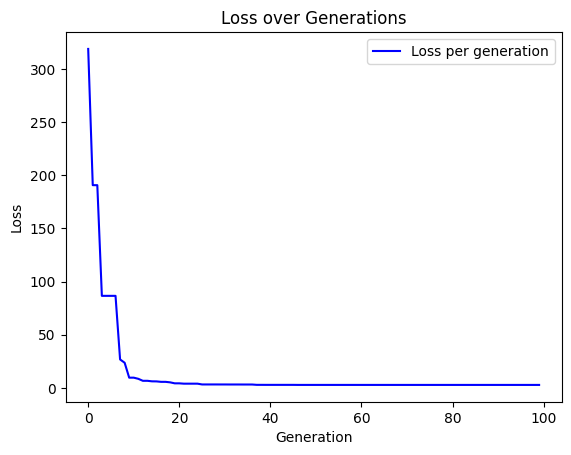

In [34]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(range(len(losses_list)), losses_list, label='Loss per generation', color='blue')
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.title('Loss over Generations')
    plt.legend()
    plt.show()


losses_list = run_GA()
visualize_loss(losses_list)

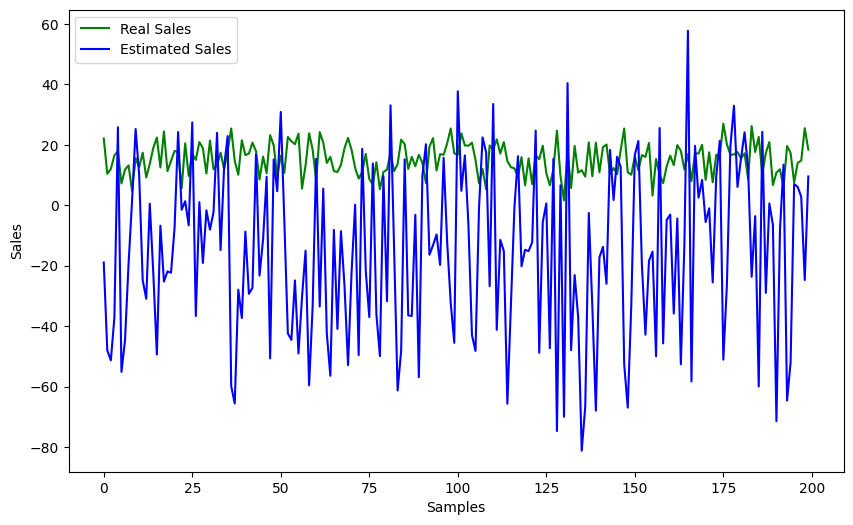

In [35]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness, reverse=True)
    theta = np.array(sorted_population[0])
    estimated_prices = features_X.dot(theta)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sales_Y, c='green', label='Real Sales')
    plt.plot(estimated_prices, c='blue', label='Estimated Sales')
    plt.xlabel('Samples')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

visualize_predict_gt()